In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
from sklearn import tree
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neighbors import DistanceMetric
from sklearn.metrics import confusion_matrix
from sklearn.ensemble import RandomForestClassifier


In [3]:
customer_df=pd.read_csv("C:/Users/Dell/Downloads/datascience/predicting-churn-for-bank-customers/Churn_Modelling.csv")

In [4]:
customer_df.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [6]:
customer_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   RowNumber        10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [8]:
#checking no NAN
customer_df.isna().sum()

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [11]:
customer_df[customer_df.duplicated(keep="first")].count()#checking duplicates

RowNumber          0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

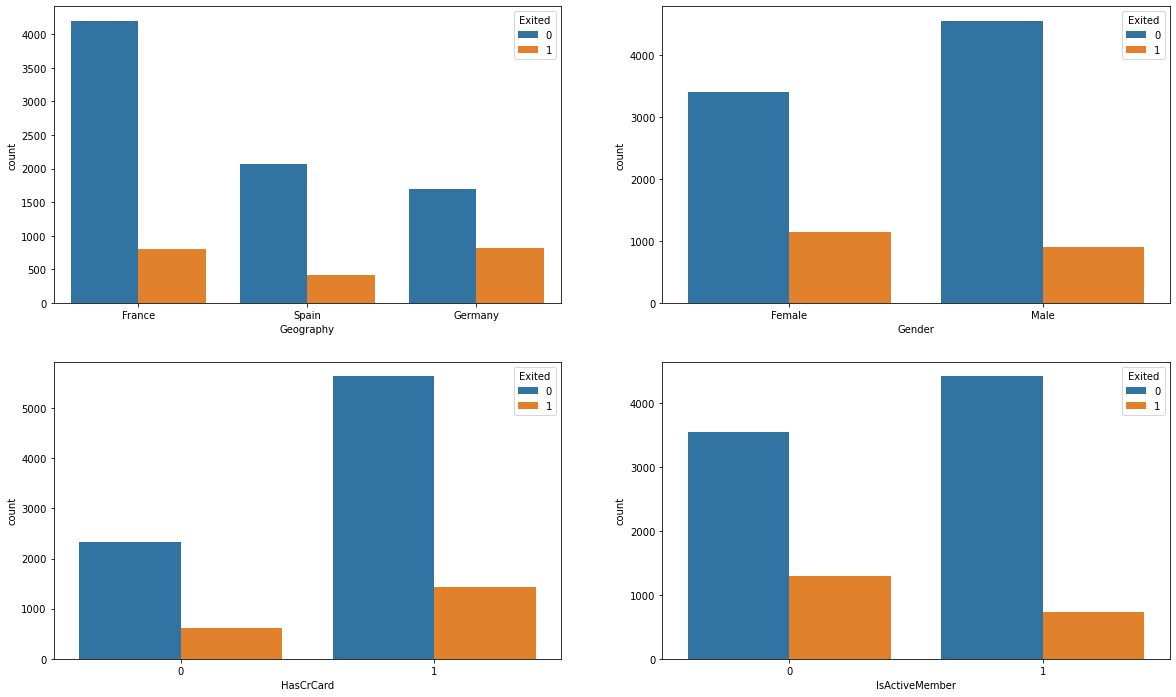

In [17]:
   # visualization
exited_customers = customer_df[customer_df["Exited"] == 1]
remained_customers = customer_df[customer_df["Exited"] == 0]
exited_Male = exited_customers[exited_customers["Gender"] == "Male"]
remained_Male = remained_customers[remained_customers["Gender"] == "Male"]
exited_Female = exited_customers[exited_customers["Gender"] == "Female"]
remained_Female = remained_customers[remained_customers["Gender"] == "Female"]

labels = ['Exited', 'Stayed']
sizes = [len(exited_customers), len(remained_customers)]
fig, axarr = plt.subplots(2, 2, figsize=(20, 12))
sns.countplot(x='Geography', hue = 'Exited',data = customer_df, ax=axarr[0][0])
sns.countplot(x='Gender', hue = 'Exited',data = customer_df, ax=axarr[0][1])
sns.countplot(x='HasCrCard', hue = 'Exited',data = customer_df, ax=axarr[1][0])
sns.countplot(x='IsActiveMember', hue = 'Exited',data = customer_df, ax=axarr[1][1])


In [19]:
exit_probability=len(exited_customers)/(len(exited_customers)+len(remained_customers))#exited proability

In [20]:
exit_probability

0.2037

In [25]:
#exited male proability
exited_Male = exited_customers[exited_customers["Gender"] == "Male"]
male_exit_probability=len(exited_Male)/len((customer_df[customer_df["Gender"]=='Male']))

In [26]:
male_exit_probability

0.16455928165658787

In [29]:
#credit card ownern proability
exited_Credit_card_owner = exited_customers[exited_customers["HasCrCard"] == 1]
credit_card_owner_exit_probability = len(exited_Credit_card_owner)/len((customer_df[customer_df["HasCrCard"] == 1]))
credit_card_owner_exit_probability

0.20184266477675408

In [30]:
#proability of having spaning account holder
exited_spain_customer = exited_customers[exited_customers["Geography"] == "Spain"]
spain_customer_exit_probability = len(exited_spain_customer) / len((customer_df[customer_df["Geography"] == "Spain"]))
spain_customer_exit_probability

0.1667339523617279

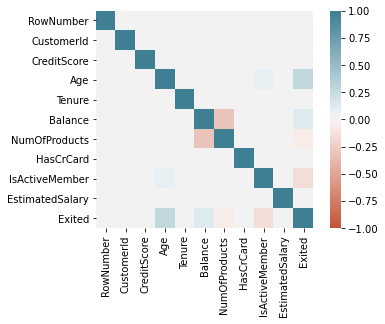

In [44]:

corr = customer_df.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True
)


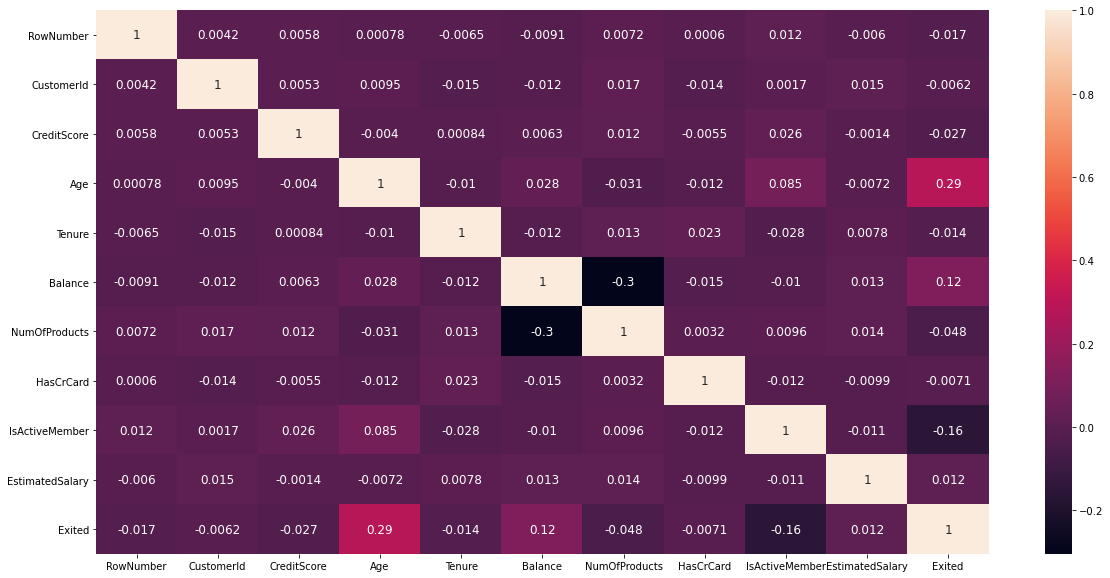

In [45]:
fig, ax = plt.subplots(figsize=(20,10))
sns.heatmap(corr, annot=True, annot_kws={"size": 12},ax=ax)

In [49]:
#regression
# Creating dummy variables
gender_dummies = pd.get_dummies(customer_df["Gender"])
geography_dummies = pd.get_dummies(customer_df["Geography"])
# Adding them to our dataframe and removing unecessary dataframes
new_customers_df = pd.concat([customer_df,gender_dummies,geography_dummies],axis=1)
#Removing unecessary columns
new_customers_df = new_customers_df.drop(["RowNumber", "CustomerId","Surname","Geography","Gender"], axis=1)
new_customers_df.head()

,CreditScore,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Female,Male,France,Germany,Spain
0,619,42,2,0.00,1,1,1,101348.88,1,1,0,1,0,0
1,608,41,1,83807.86,1,0,1,112542.58,0,1,0,0,0,1
2,502,42,8,159660.80,3,1,0,113931.57,1,1,0,1,0,0
3,699,39,1,0.00,2,0,0,93826.63,0,1,0,1,0,0
4,850,43,2,125510.82,1,1,1,79084.10,0,1,0,0,0,1


In [50]:
X = new_customers_df.drop(["Exited"],axis=1)
y = new_customers_df["Exited"]

In [51]:
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn import metrics
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.3,random_state=0)

In [53]:
logreg = LogisticRegression()
logreg.fit(X_train,y_train)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [56]:
y_pred=logreg.predict(X_test)

In [57]:
logreg.score(X_test,y_test)#accuracy using logistic regressionn

0.784

In [58]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
confusion_matrix(y_test,y_pred)

array([[2316,   63],
       [ 585,   36]], dtype=int64)

In [59]:
classification_report(y_test,y_pred)

'              precision    recall  f1-score   support\n\n           0       0.80      0.97      0.88      2379\n           1       0.36      0.06      0.10       621\n\n    accuracy                           0.78      3000\n   macro avg       0.58      0.52      0.49      3000\nweighted avg       0.71      0.78      0.72      3000\n'

In [61]:
#decision Tree


In [63]:
max_depths = [30,20,15,10,9,8,7,6,5,4,3,2,1]
models = [tree.DecisionTreeClassifier(max_depth=x).fit(X_train,y_train) for x in max_depths]
for m,d in zip(models,max_depths):
     print('depth = ',d,'train_accuracy = ',round(m.score(X_train,y_train),3),'valid_accuracy = ',round(m.score(X_test,y_test),3))

depth =  30 train_accuracy =  1.0 valid_accuracy =  0.8
depth =  20 train_accuracy =  0.997 valid_accuracy =  0.805
depth =  15 train_accuracy =  0.97 valid_accuracy =  0.815
depth =  10 train_accuracy =  0.905 valid_accuracy =  0.844
depth =  9 train_accuracy =  0.894 valid_accuracy =  0.853
depth =  8 train_accuracy =  0.881 valid_accuracy =  0.851
depth =  7 train_accuracy =  0.874 valid_accuracy =  0.856
depth =  6 train_accuracy =  0.867 valid_accuracy =  0.861
depth =  5 train_accuracy =  0.859 valid_accuracy =  0.859
depth =  4 train_accuracy =  0.85 valid_accuracy =  0.855
depth =  3 train_accuracy =  0.84 valid_accuracy =  0.84
depth =  2 train_accuracy =  0.827 valid_accuracy =  0.836
depth =  1 train_accuracy =  0.798 valid_accuracy =  0.793


In [64]:
DTreemodel=tree.DecisionTreeClassifier(max_depth=6).fit(X_train,y_train)

In [65]:
print('train_accuracy = ',round(DTreemodel.score(X_train,y_train),2),'valid_accuracy = ',round(DTreemodel.score(X_test,y_test),2))

train_accuracy =  0.87 valid_accuracy =  0.86


In [66]:
y_pred_D_Tree = DTreemodel.predict(X_test)


In [67]:
confusion_matrix = confusion_matrix(y_test, y_pred_D_Tree)

In [68]:
print(confusion_matrix)

[[2271  108]
 [ 312  309]]


In [69]:
classification_report(y_test, y_pred_D_Tree)

'              precision    recall  f1-score   support\n\n           0       0.88      0.95      0.92      2379\n           1       0.74      0.50      0.60       621\n\n    accuracy                           0.86      3000\n   macro avg       0.81      0.73      0.76      3000\nweighted avg       0.85      0.86      0.85      3000\n'

In [72]:
#knn
n = np.arange(1,21)
models = [KNeighborsClassifier(n_neighbors=x).fit(X_train,y_train) for x in n]
scores_train = [models[x-1].score(X_train,y_train) for x in n]
scores_valid = [models[x-1].score(X_test,y_test) for x in n]

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(n,scores_train,label='train')
ax.plot(n,scores_valid,label='valid')
ax.grid(linestyle='--')
ax.legend()
ax.set_xticks(n)
ax.set_xlabel('n neighbors')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy of KNN with number of neighbors')
plt.close('all')



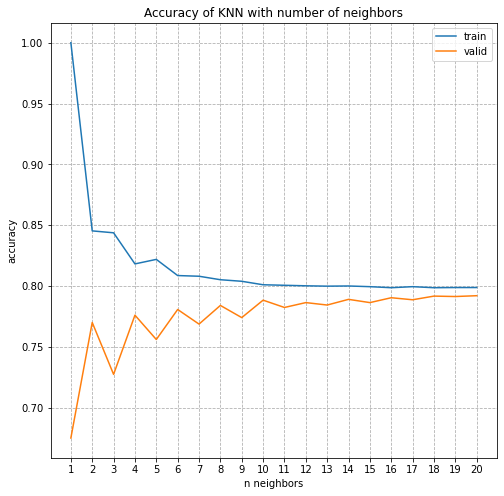

In [73]:
fig

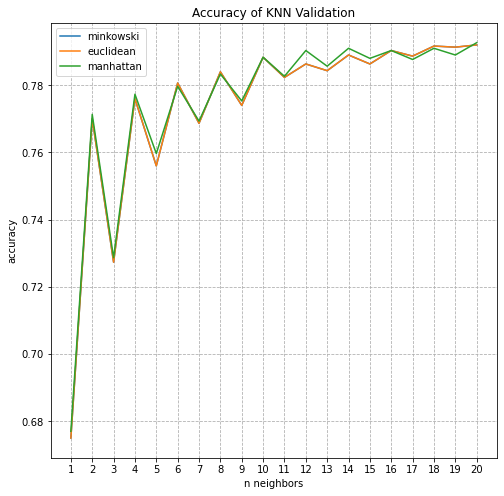

In [75]:

n = np.arange(1,21)

models_minkowski = [KNeighborsClassifier(
    n_neighbors=x,
    metric='minkowski').fit(X_train,y_train) for x in n]
models_euclidean = [KNeighborsClassifier(
    n_neighbors=x,
    metric='euclidean').fit(X_train,y_train) for x in n]
models_manhattan = [KNeighborsClassifier(
    n_neighbors=x,
    metric='manhattan').fit(X_train,y_train) for x in n]


valid_minkowski = [models_minkowski[x-1].score(X_test,y_test) for x in n]
valid_euclidean = [models_euclidean[x-1].score(X_test,y_test) for x in n]
valid_manhattan = [models_manhattan[x-1].score(X_test,y_test) for x in n]
train_manhattan = [models_manhattan[x-1].score(X_test,y_test) for x in n]

fig, ax = plt.subplots(figsize=(8,8))
ax.plot(n,valid_minkowski,label='minkowski')
ax.plot(n,valid_euclidean,label='euclidean')
ax.plot(n,valid_manhattan,label='manhattan')
ax.grid(linestyle='--')
ax.legend()
ax.set_xticks(n)
ax.set_xlabel('n neighbors')
ax.set_ylabel('accuracy')
ax.set_title('Accuracy of KNN Validation')

plt.close('all')
fig

In [76]:
valid_euclidean[16]

0.7886666666666666

In [77]:
valid_minkowski[12]

0.7843333333333333

In [81]:
KNNmodel=KNeighborsClassifier(n_neighbors=20,metric="euclidean").fit(X_train,y_train)

In [83]:
y_pred_KNN=KNNmodel.predict(X_test)

In [90]:
from sklearn.metrics import confusion_matrix
confusion_matrix = confusion_matrix(y_test, y_pred_KNN)
print(confusion_matrix)

[[2373    6]
 [ 618    3]]


In [88]:
classification_report(y_test, y_pred_KNN)

'              precision    recall  f1-score   support\n\n           0       0.79      1.00      0.88      2379\n           1       0.33      0.00      0.01       621\n\n    accuracy                           0.79      3000\n   macro avg       0.56      0.50      0.45      3000\nweighted avg       0.70      0.79      0.70      3000\n'

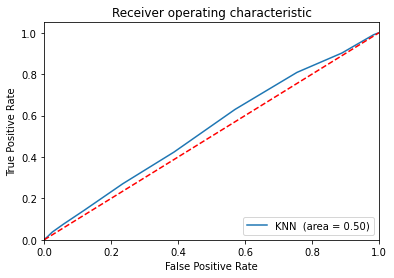

In [92]:
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
KNN_roc_auc = roc_auc_score(y_test, KNNmodel.predict(X_test))
fpr, tpr, thresholds = roc_curve(y_test, KNNmodel.predict_proba(X_test)[:,1])
plt.figure()
plt.plot(fpr, tpr, label='KNN  (area = %0.2f)' % KNN_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()